In [1]:
import pandas as pd
import numpy as np

In [2]:
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/"
extra_path = ("DLnz_NewDriftEvalExp_MSEs_1024NPaths").replace(
            ".", "")
score_eval=pd.read_parquet(root_dir + extra_path+ "_score_MSE.parquet", engine="fastparquet")
nad_eval=pd.read_parquet(root_dir + extra_path+ "_nad_MSE.parquet")
nad_eval_true_law=pd.read_parquet(root_dir + extra_path+"_nad_true_law_MSE.parquet")
score_eval_true_law=pd.read_parquet(root_dir + extra_path+"_score_true_law_MSE.parquet")
score_state_eval=pd.read_parquet(root_dir + extra_path+ "_score_state_MSE.parquet")
nad_state_eval=pd.read_parquet(root_dir + extra_path+ "_nad_state_MSE.parquet")
stable_state_eval = (pd.concat([score_state_eval.rename({d:d+"StableScoreState" for d in score_state_eval.columns}, axis=1),nad_state_eval.rename({d:d+"StableNadState" for d in score_state_eval.columns}, axis=1)], axis=1))
stable_true_law_eval = (pd.concat([score_eval_true_law.rename({d:d+"StableScoreTrue" for d in score_state_eval.columns}, axis=1),nad_eval_true_law.rename({d:d+"StableNadTrue" for d in score_state_eval.columns}, axis=1)], axis=1))
stable_alt_law_eval = (pd.concat([score_eval.rename({d:d+"StableScore" for d in score_state_eval.columns}, axis=1),nad_eval.rename({d:d+"StableNad" for d in score_state_eval.columns}, axis=1)], axis=1))

In [3]:
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/"
extra_path = ("DLnzChaos_NewDriftEvalExp_MSEs_1024NPaths").replace(
            ".", "")
score_eval=pd.read_parquet(root_dir + extra_path+ "_score_MSE.parquet", engine="fastparquet")
nad_eval=pd.read_parquet(root_dir + extra_path+ "_nad_MSE.parquet")
nad_eval_true_law=pd.read_parquet(root_dir + extra_path+"_nad_true_law_MSE.parquet")
score_eval_true_law=pd.read_parquet(root_dir + extra_path+"_score_true_law_MSE.parquet")
score_state_eval=pd.read_parquet(root_dir + extra_path+ "_score_state_MSE.parquet")
nad_state_eval=pd.read_parquet(root_dir + extra_path+ "_nad_state_MSE.parquet")
chaos_state_eval = (pd.concat([score_state_eval.rename({d:d+"ChaosScoreState" for d in score_state_eval.columns}, axis=1),nad_state_eval.rename({d:d+"ChaosNadState" for d in score_state_eval.columns}, axis=1)], axis=1))
chaos_true_law_eval = (pd.concat([score_eval_true_law.rename({d:d+"ChaosScoreTrue" for d in score_state_eval.columns}, axis=1),nad_eval_true_law.rename({d:d+"ChaosNadTrue" for d in score_state_eval.columns}, axis=1)], axis=1))
chaos_alt_law_eval = (pd.concat([score_eval.rename({d:d+"ChaosScore" for d in score_state_eval.columns}, axis=1),nad_eval.rename({d:d+"ChaosNad" for d in score_state_eval.columns}, axis=1)], axis=1))

In [4]:
true_law_eval = (pd.concat([chaos_true_law_eval, stable_true_law_eval], axis=1)).sort_index(axis=1)

In [5]:
alt_law_eval =(pd.concat([chaos_alt_law_eval, stable_alt_law_eval], axis=1)).sort_index(axis=1)

In [6]:
state_eval = (pd.concat([chaos_state_eval, stable_state_eval], axis=1)).sort_index(axis=1)

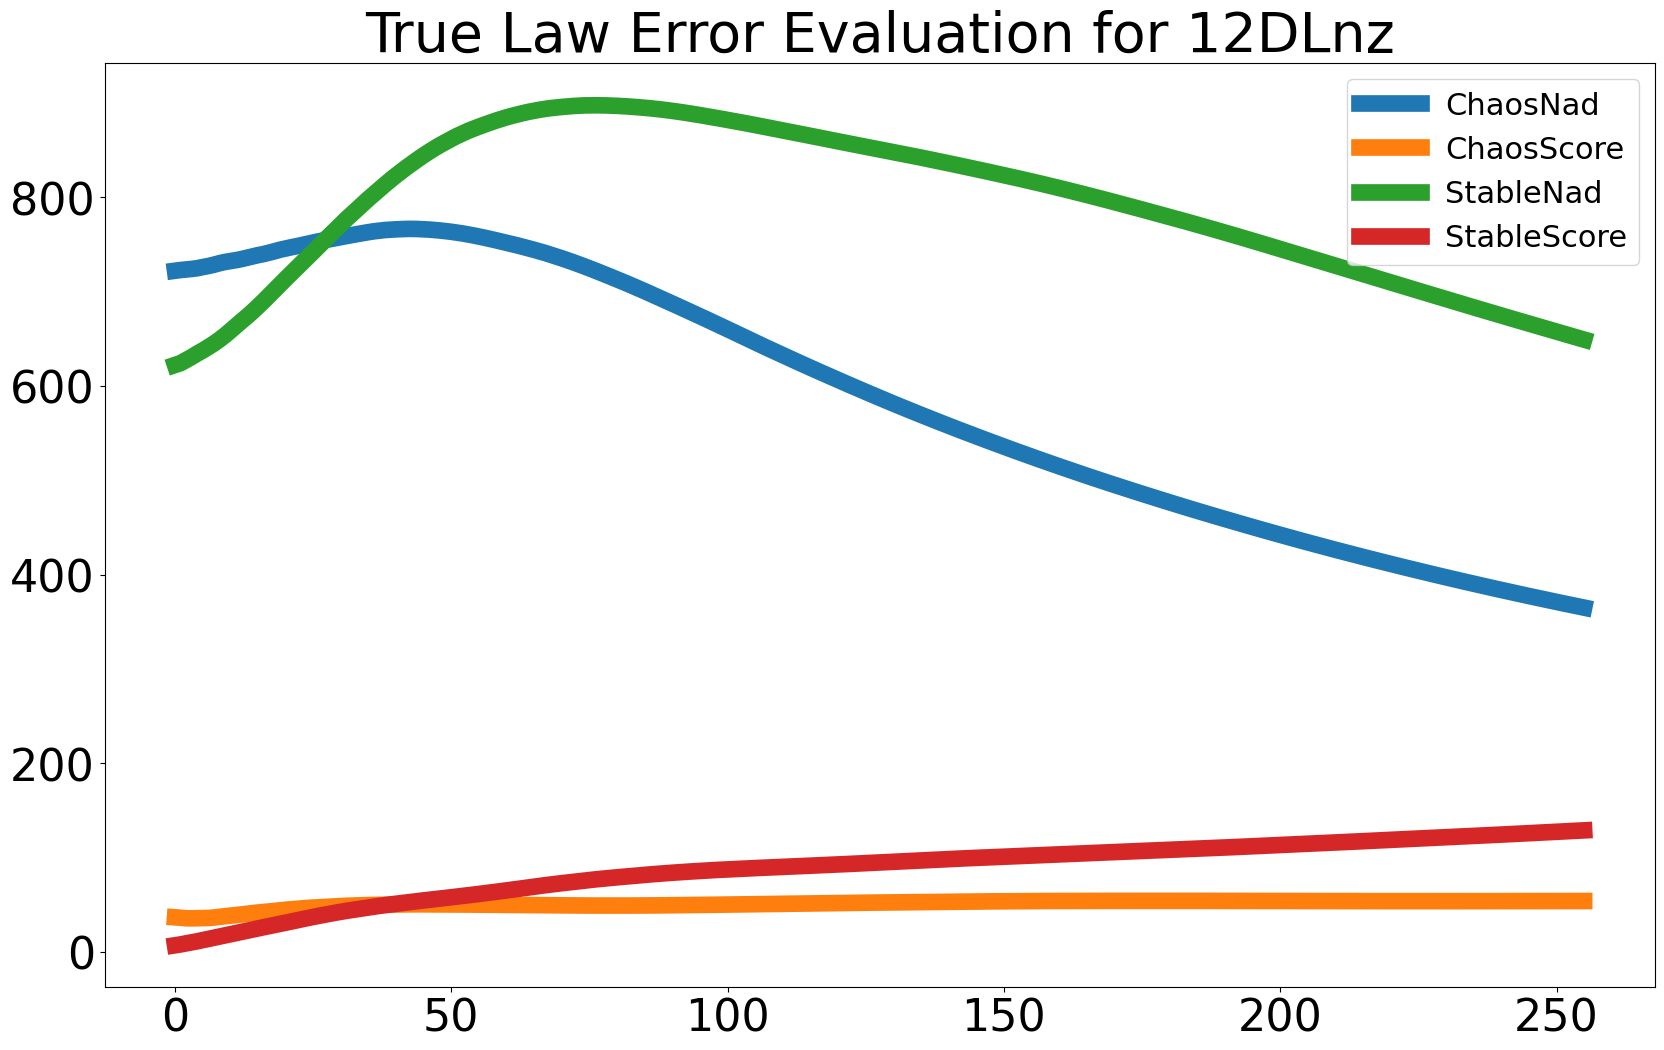

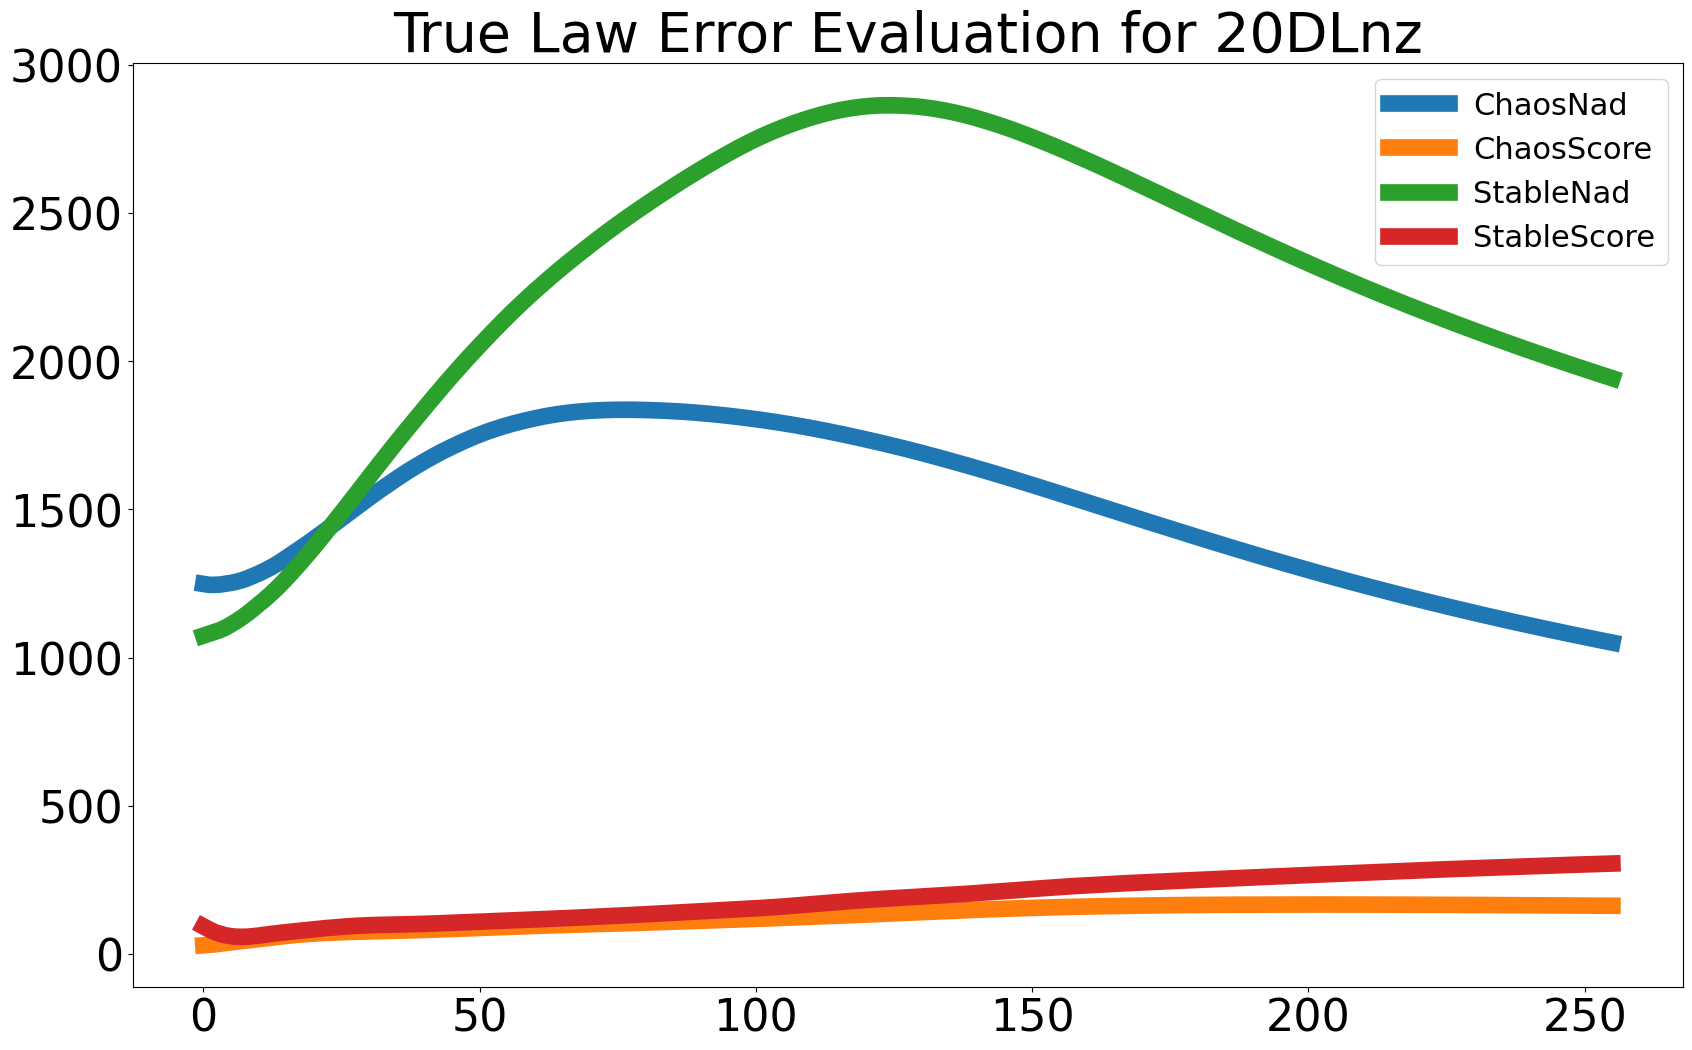

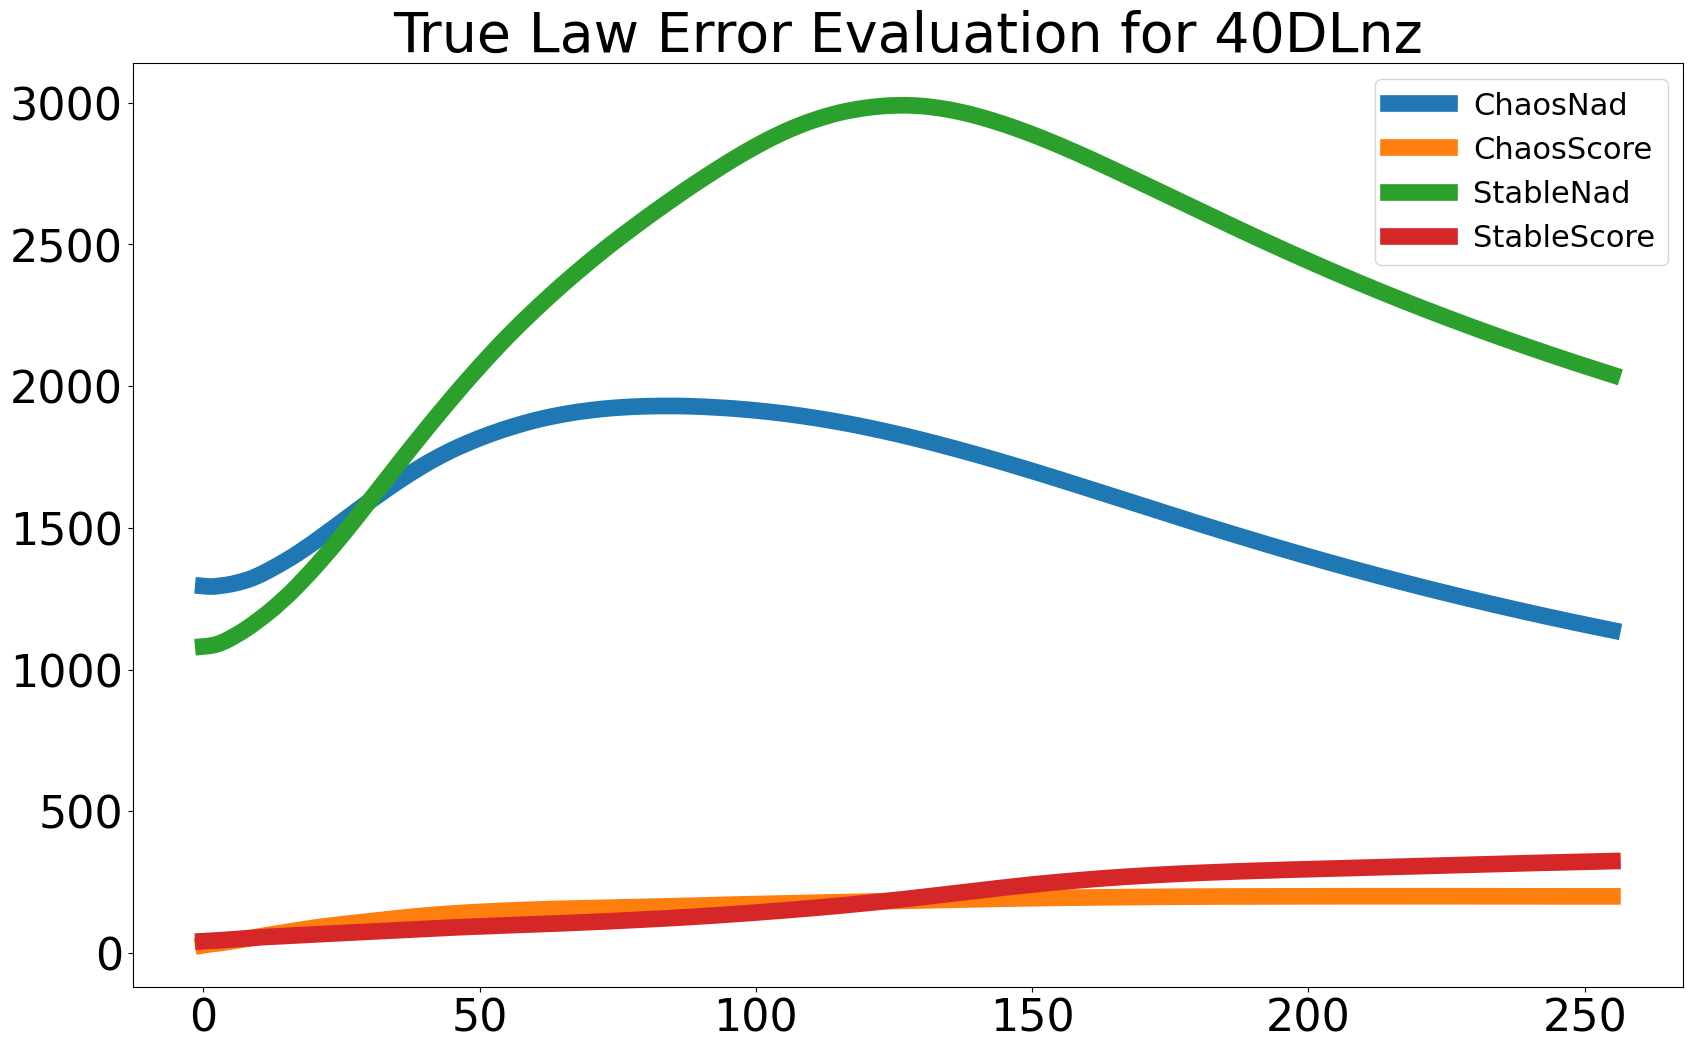

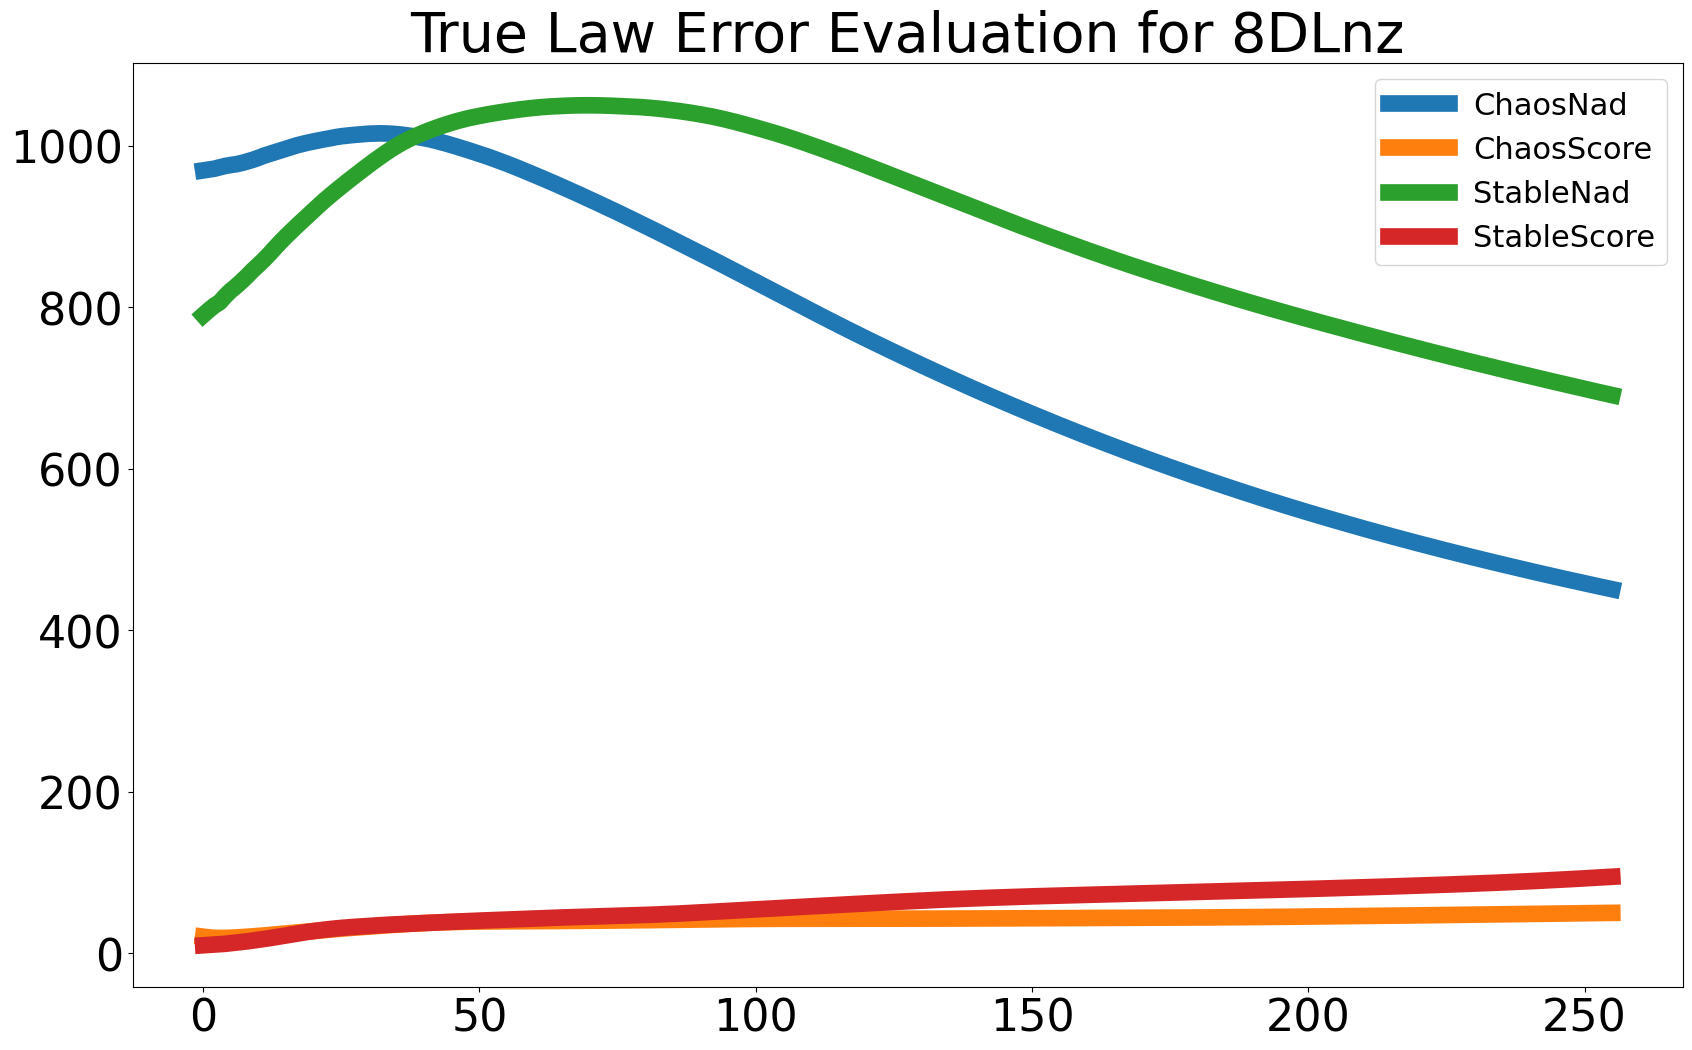

In [7]:
import matplotlib.pyplot as plt
for k in range(0, true_law_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(20, 12))
    currevals = true_law_eval.iloc[:, k:k+4]
    currevals.rename({d:d.split("DLnz")[-1].replace("True", "") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=12)
    plt.legend(fontsize=22)
    ax.tick_params(labelsize=32)
    plt.title(f"True Law Error Evaluation for {true_law_eval.columns[k].split('DLnz')[0]}DLnz", fontsize=40)
    plt.show()
    plt.close()

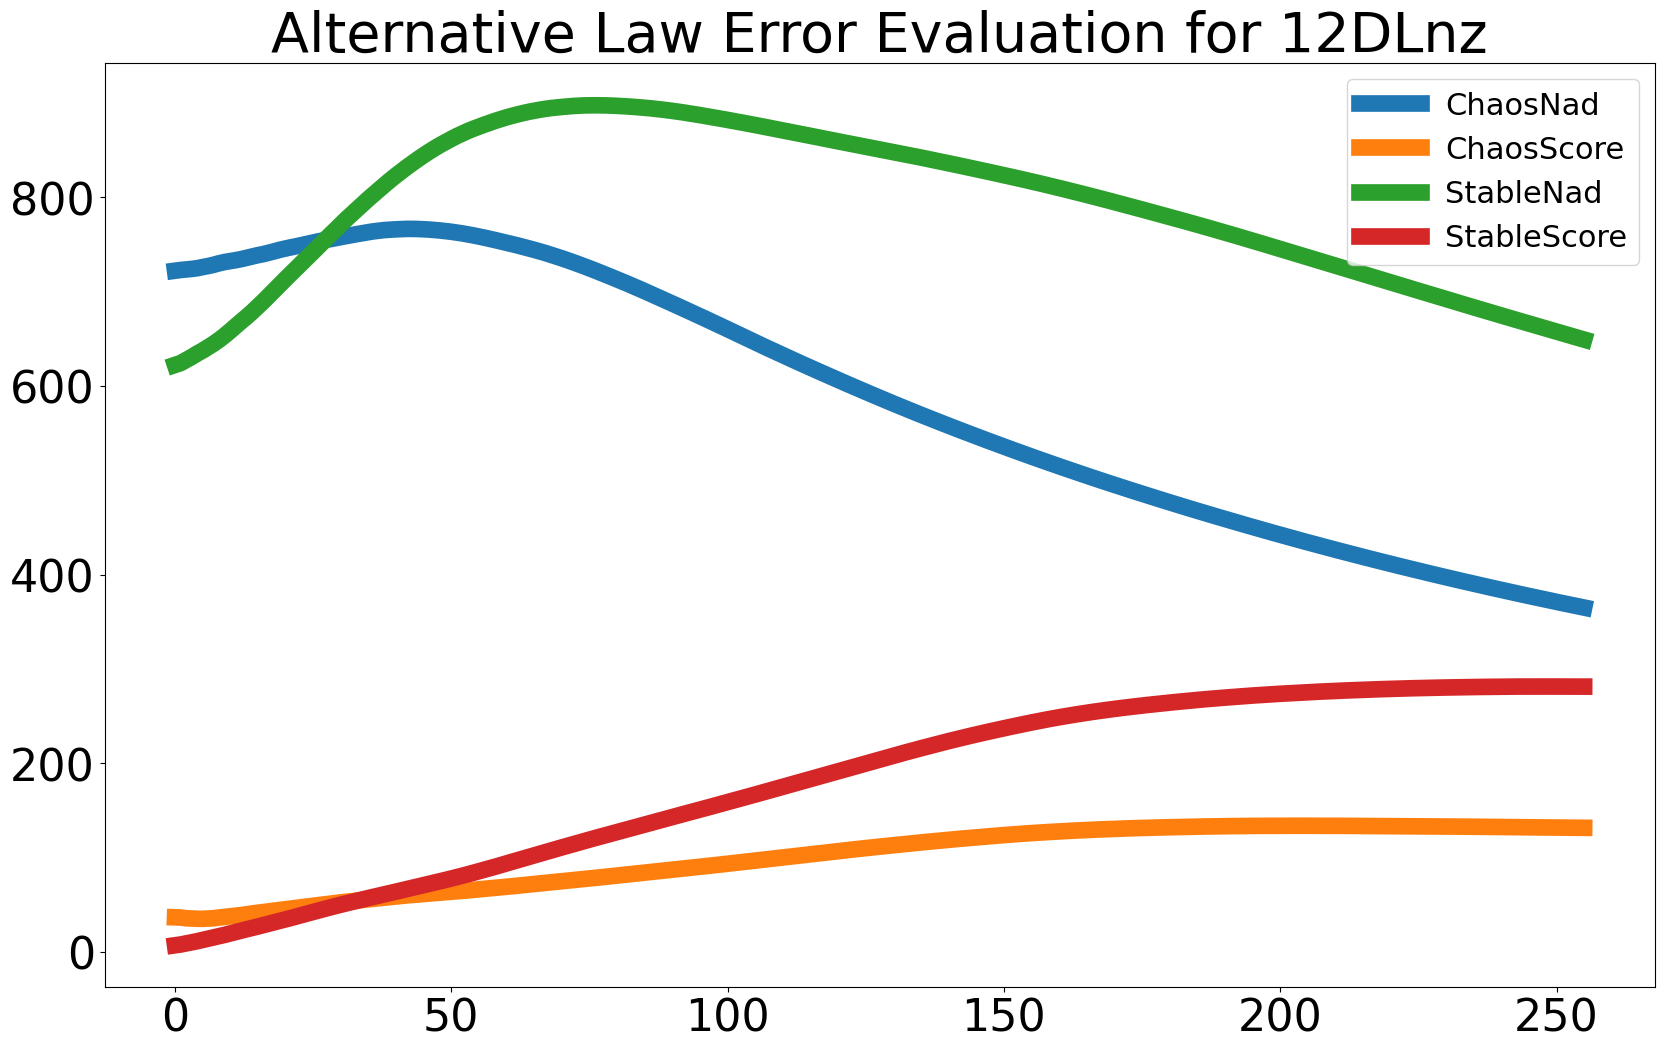

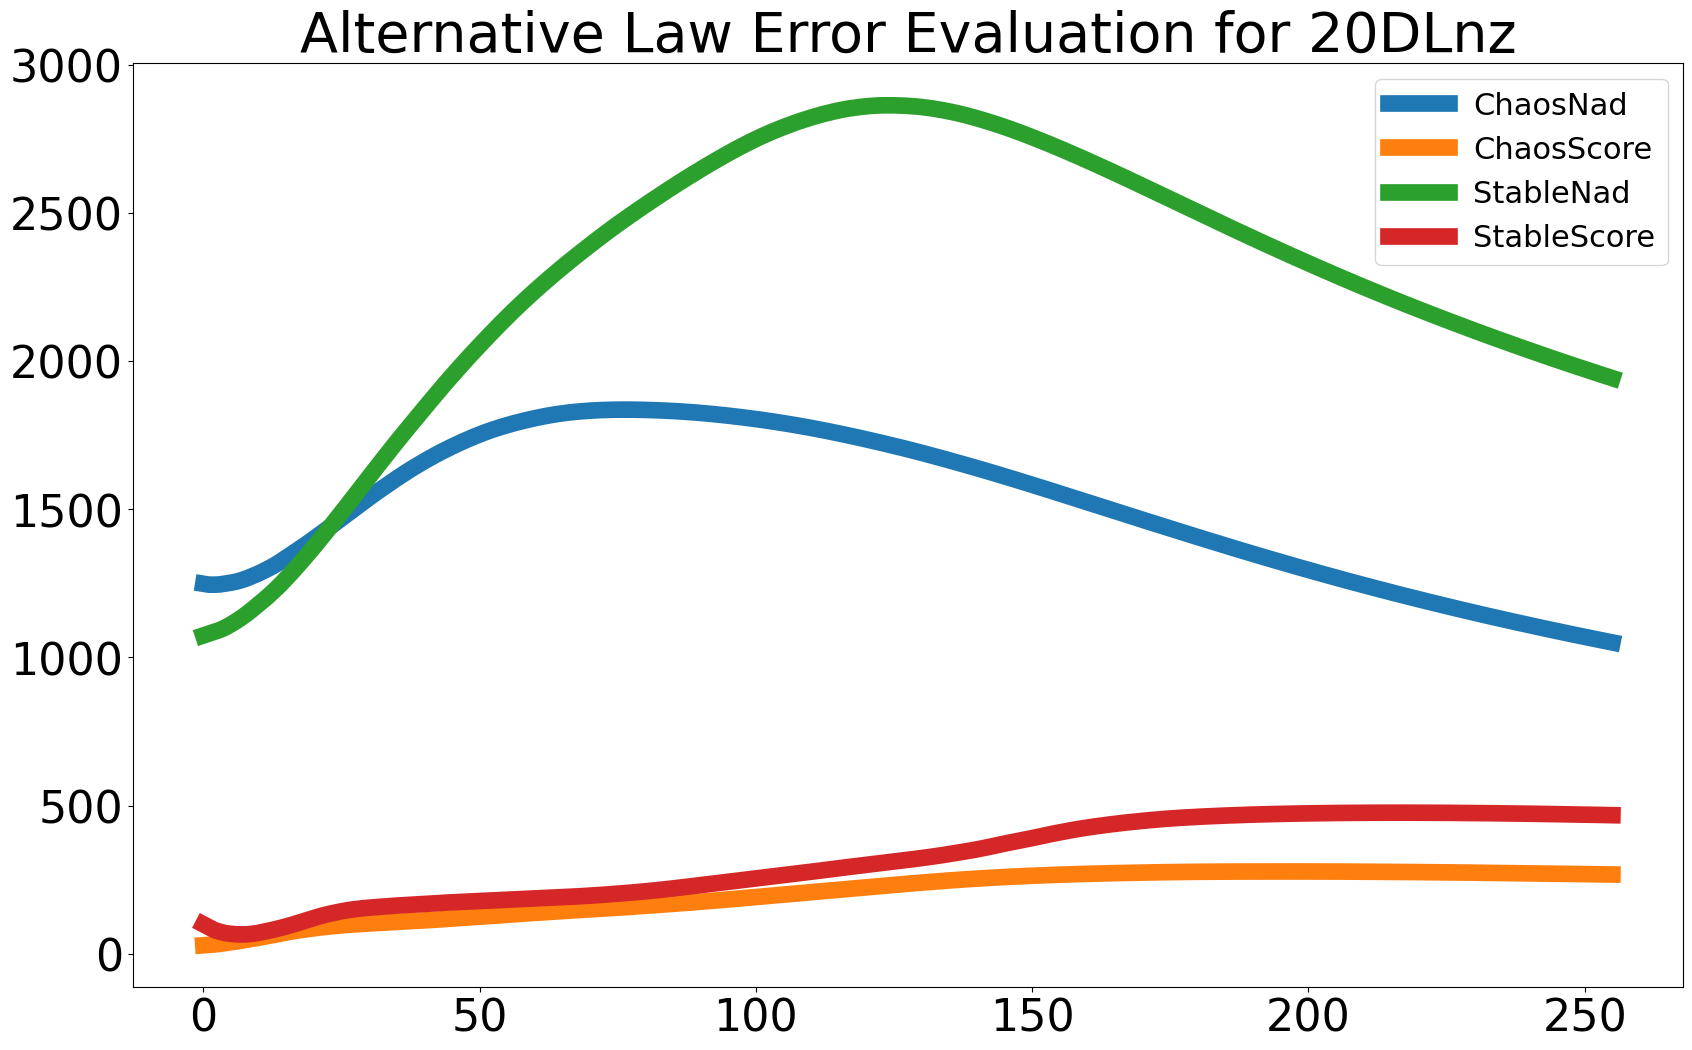

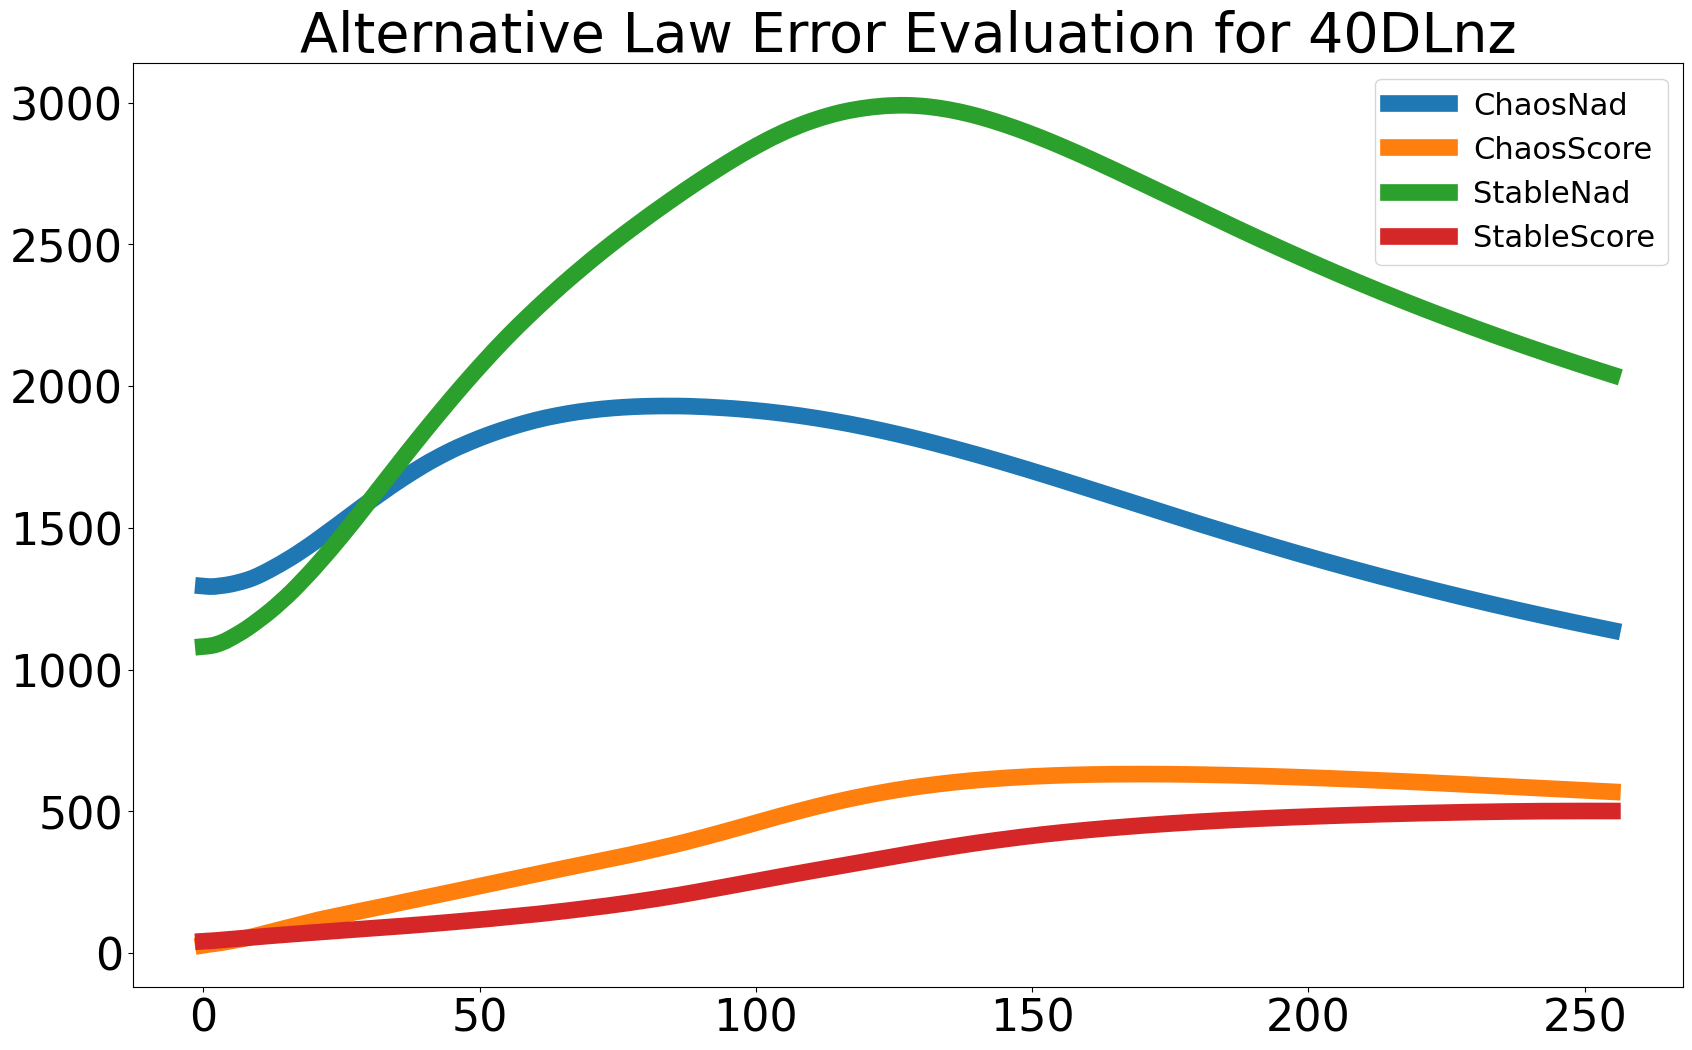

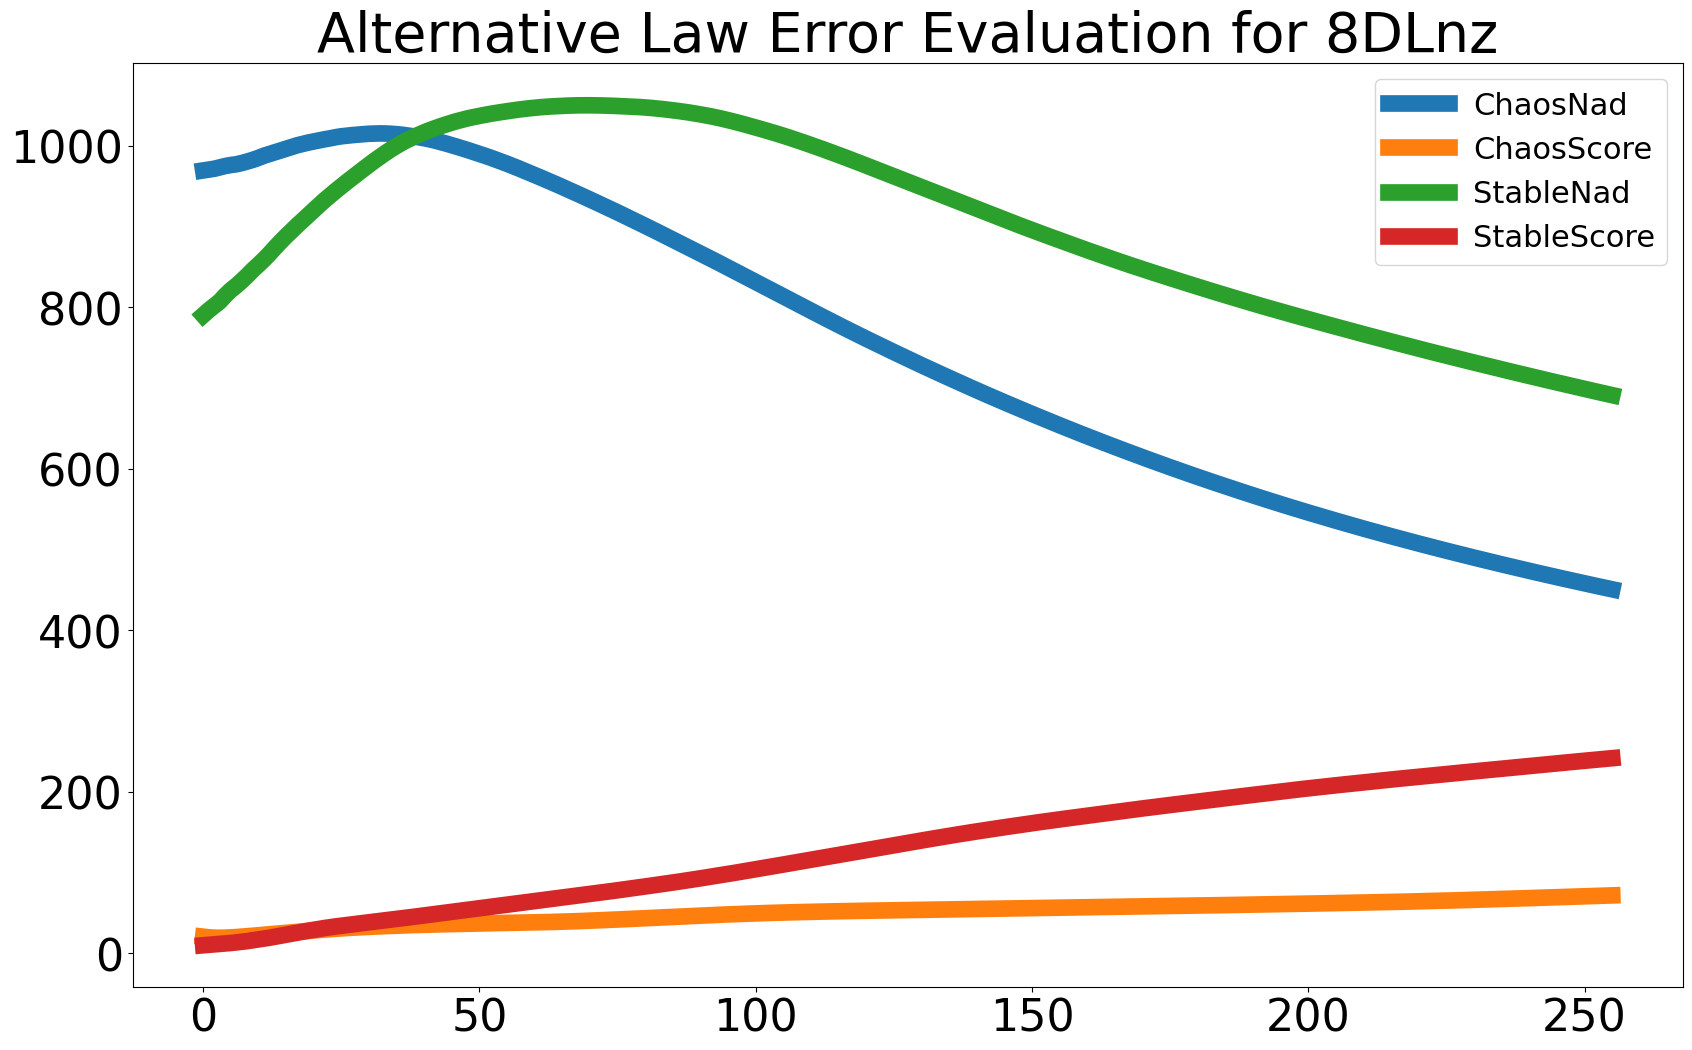

In [8]:
import matplotlib.pyplot as plt
for k in range(0, alt_law_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(20, 12))
    currevals = alt_law_eval.iloc[:, k:k+4]
    currevals.rename({d:d.split("DLnz")[-1].replace("True", "") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=12)
    plt.legend(fontsize=22)
    ax.tick_params(labelsize=32)
    plt.title(f"Alternative Law Error Evaluation for {alt_law_eval.columns[k].split('DLnz')[0]}DLnz", fontsize=40)
    plt.show()
    plt.close()

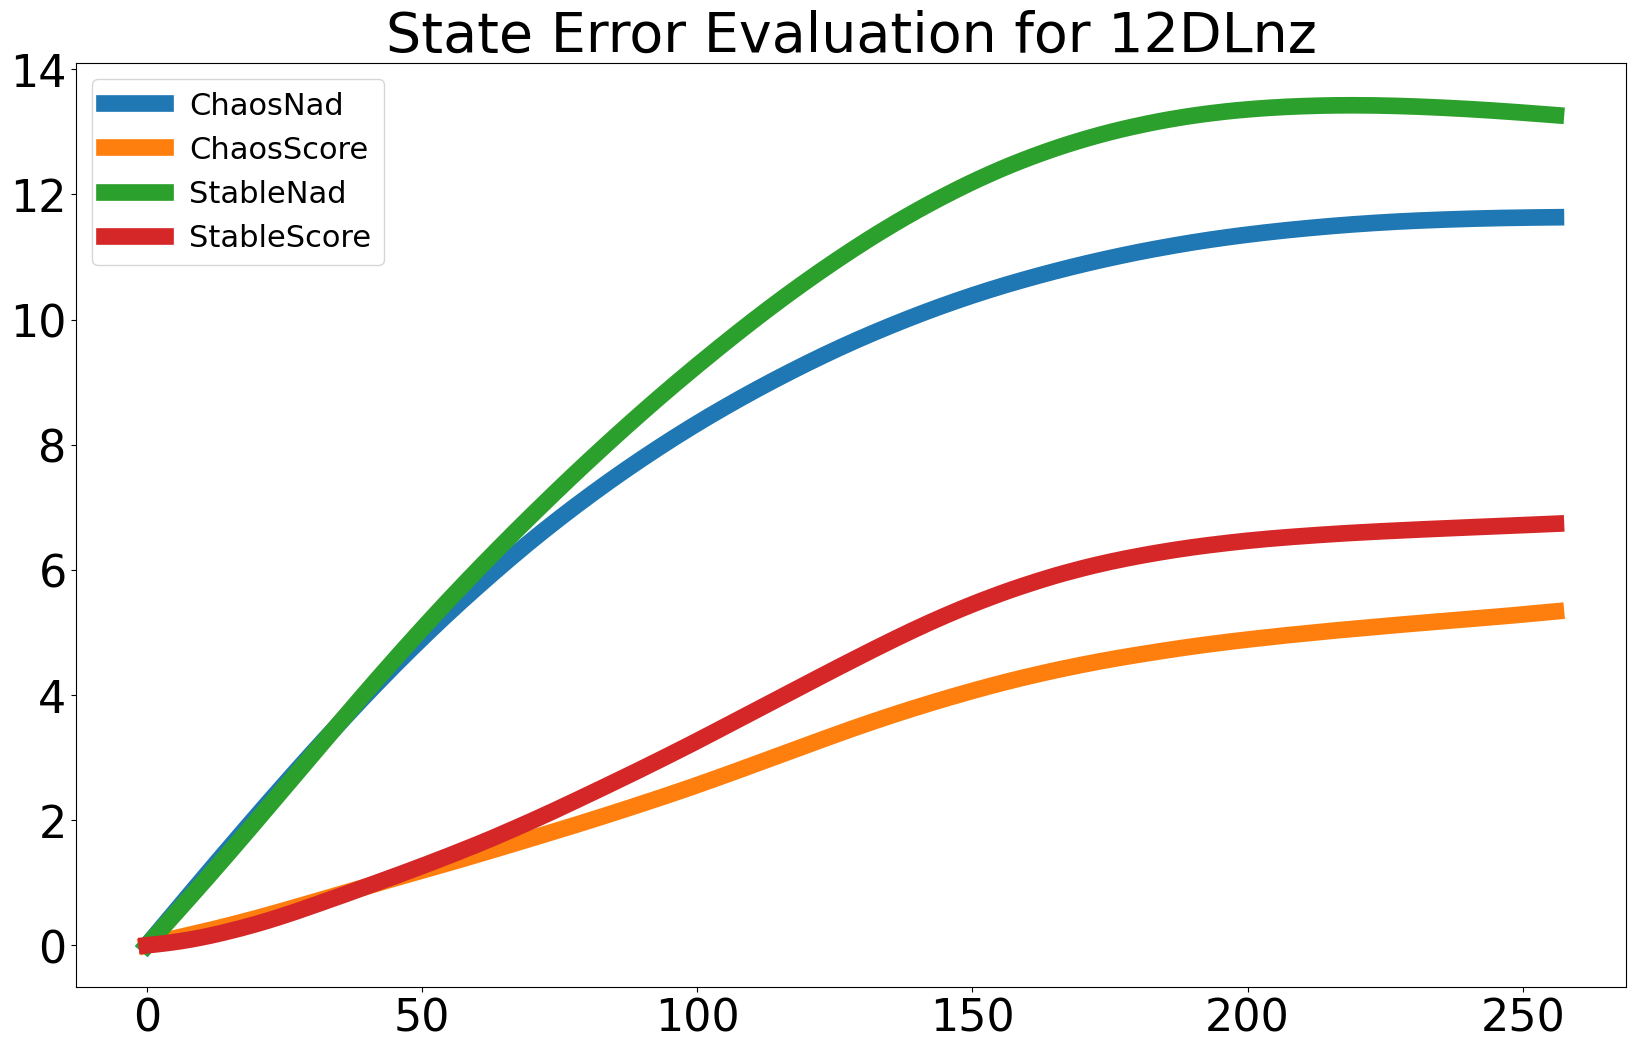

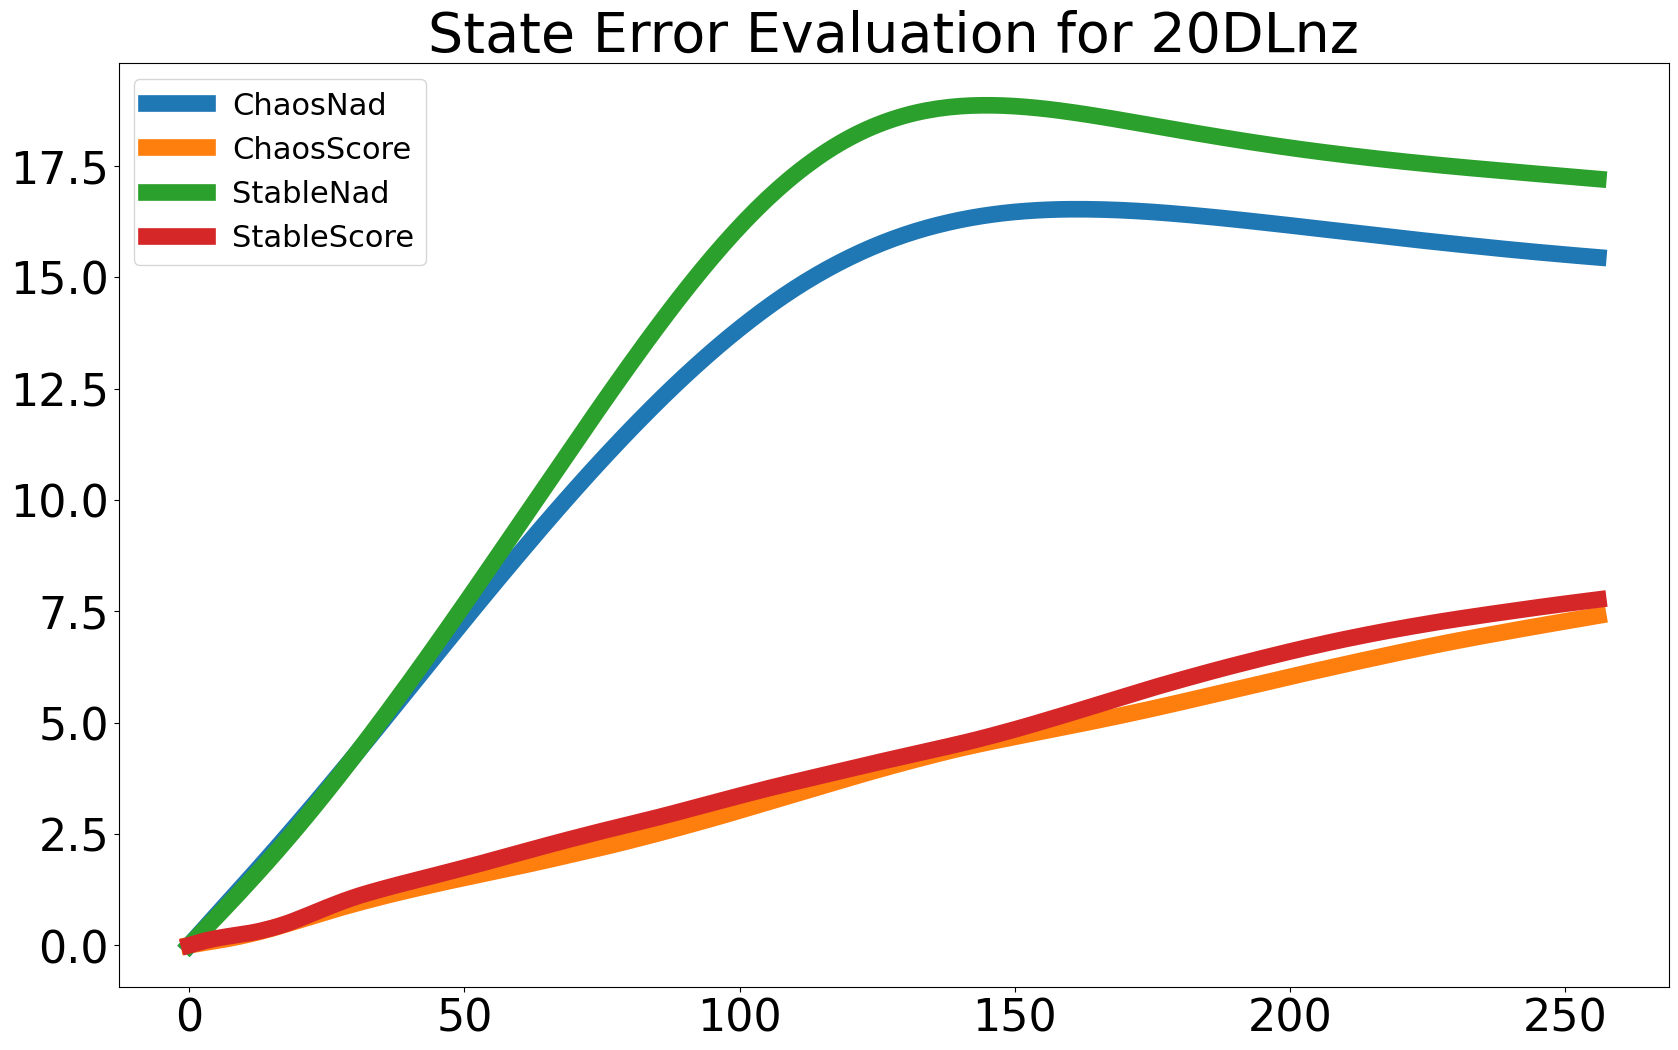

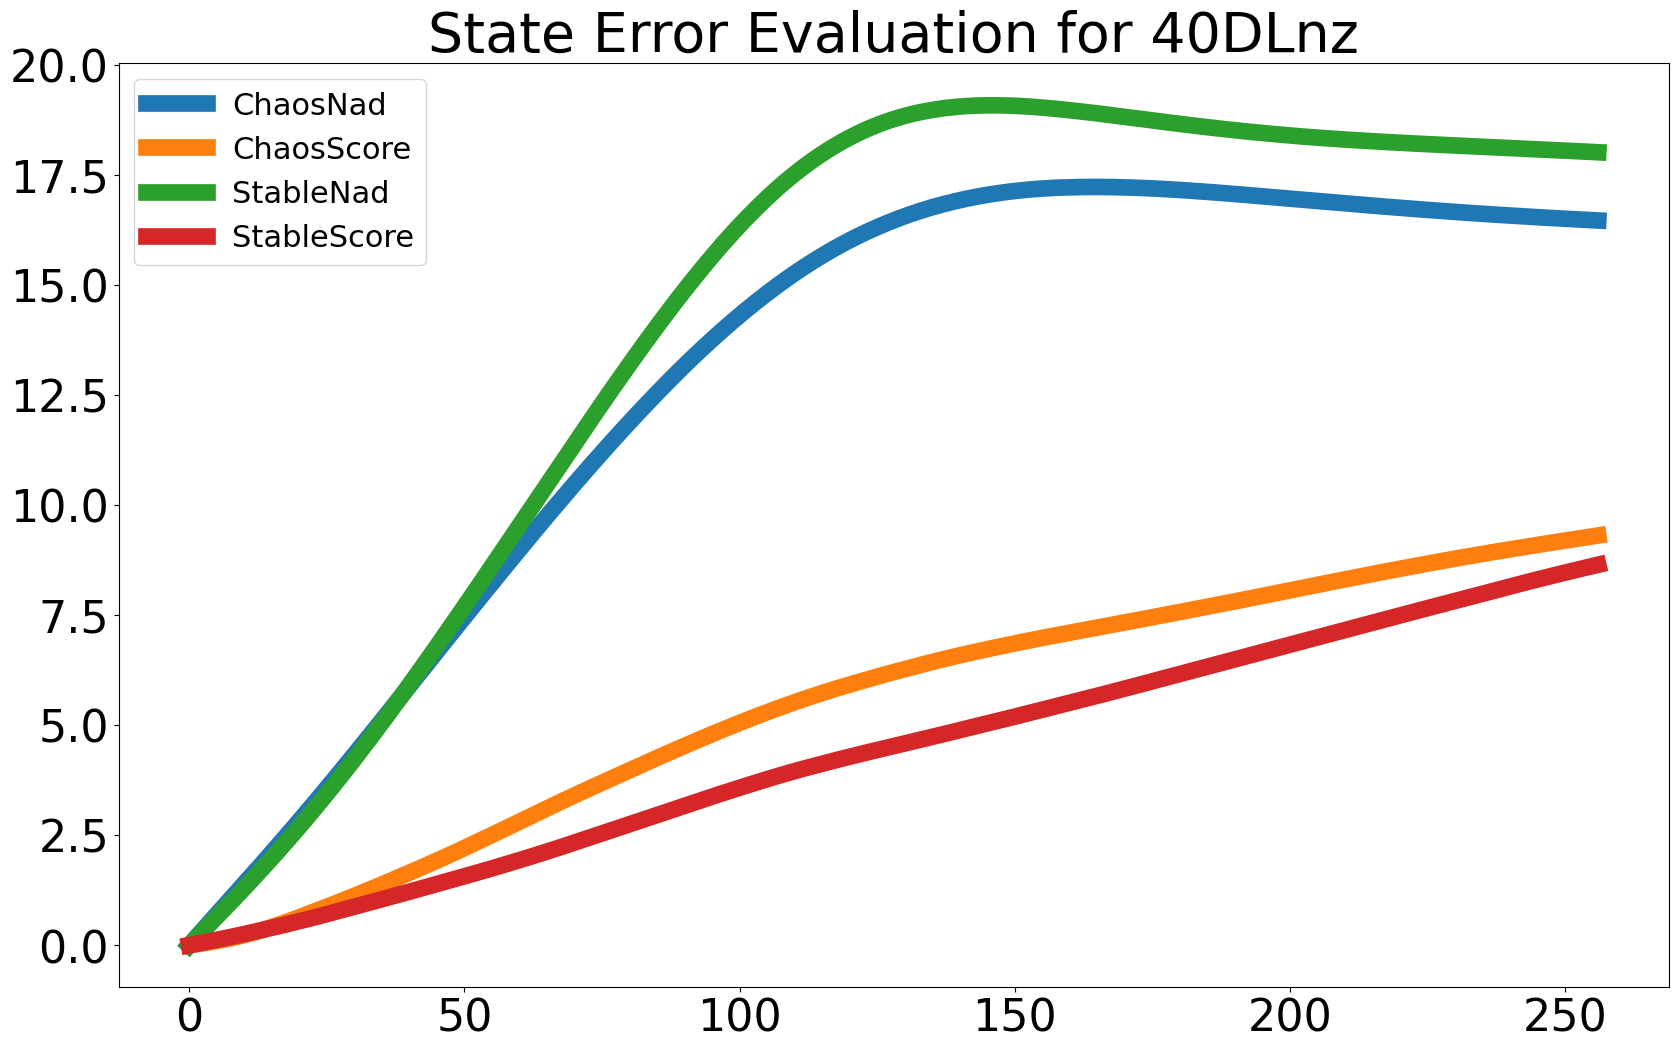

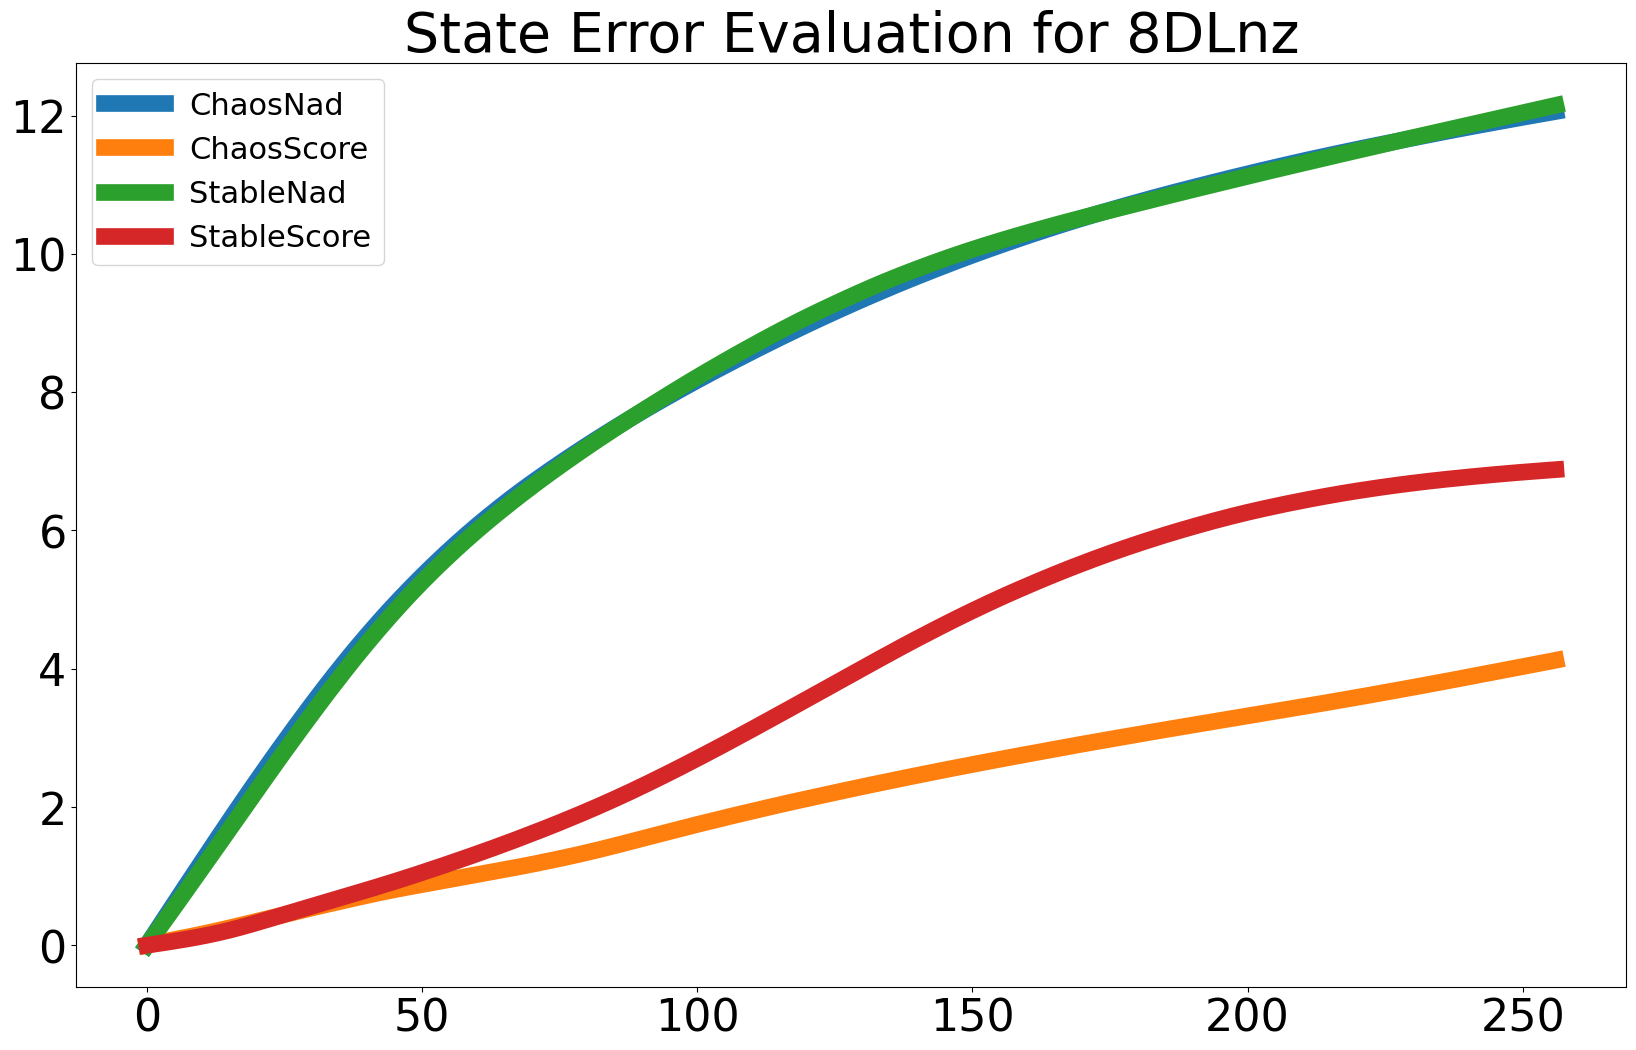

In [9]:
import matplotlib.pyplot as plt
for k in range(0, state_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(20, 12))
    currevals = state_eval.iloc[:, k:k+4]
    currevals.rename({d:d.split("DLnz")[-1].replace("State", "") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=12)
    plt.legend(fontsize=22)
    ax.tick_params(labelsize=32)
    plt.title(f"State Error Evaluation for {state_eval.columns[k].split('DLnz')[0]}DLnz", fontsize=40)
    plt.show()
    plt.close()

In [10]:
state_eval

,12DLnzChaosNadState,12DLnzChaosScoreState,12DLnzStableNadState,12DLnzStableScoreState,20DLnzChaosNadState,20DLnzChaosScoreState,20DLnzStableNadState,20DLnzStableScoreState,40DLnzChaosNadState,40DLnzChaosScoreState,40DLnzStableNadState,40DLnzStableScoreState,8DLnzChaosNadState,8DLnzChaosScoreState,8DLnzStableNadState,8DLnzStableScoreState
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.105057,0.022400,0.096651,0.008778,0.138337,0.020444,0.128048,0.035182,0.140859,0.017726,0.128790,0.025311,0.121400,0.018687,0.108920,0.011695
2,0.209944,0.045628,0.193979,0.018294,0.276196,0.040242,0.255884,0.072507,0.281222,0.036179,0.257036,0.049556,0.242860,0.036021,0.218522,0.023475
3,0.314816,0.068189,0.291477,0.028326,0.413484,0.059876,0.384179,0.105424,0.421139,0.055859,0.385182,0.073670,0.364197,0.052196,0.328724,0.035560
4,0.419553,0.089482,0.389392,0.039423,0.550551,0.079512,0.512755,0.132521,0.560814,0.076137,0.513405,0.098282,0.485430,0.067739,0.439336,0.047859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,11.632115,5.303561,13.294811,6.722661,15.484579,7.315762,17.244353,7.699926,16.489560,9.232412,18.038998,8.526305,12.003599,4.060843,12.077500,6.855587
253,11.633219,5.311487,13.288163,6.726248,15.474182,7.337057,17.234016,7.715812,16.482954,9.251588,18.032724,8.555987,12.017591,4.076315,12.095404,6.861719
254,11.634287,5.319920,13.281365,6.729956,15.463815,7.358310,17.223639,7.731478,16.476424,9.270825,18.026447,8.585635,12.031594,4.091741,12.113359,6.867698
255,11.635196,5.328347,13.274512,6.733892,15.453620,7.379707,17.213245,7.746918,16.469942,9.289712,18.020085,8.615270,12.045498,4.107376,12.131175,6.873670
